## Regression

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [146]:
df = pd.read_csv('/kaggle/input/cs114-reg/annonimized.csv')
df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [147]:
df = df.rename(columns={
    "concat('it001',`assignment_id`)": "assignment",
    "concat('it001',`problem_id`)": "problem",
    "concat('it001', username)": "user",
    "concat('it001',`language_id`)": "language"
})
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


### kiểm tra dữ liệu

In [25]:
row, column = df.shape
print(f"Row: {row}, Column: {column}")

Row: 295198, Column: 11


In [16]:
df.isnull().sum()

assignment     0
problem        0
user           0
is_final       0
status         0
pre_score      0
coefficient    0
language       0
created_at     0
updated_at     0
judgement      0
dtype: int64

In [6]:
df["assignment"].nunique()

203

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

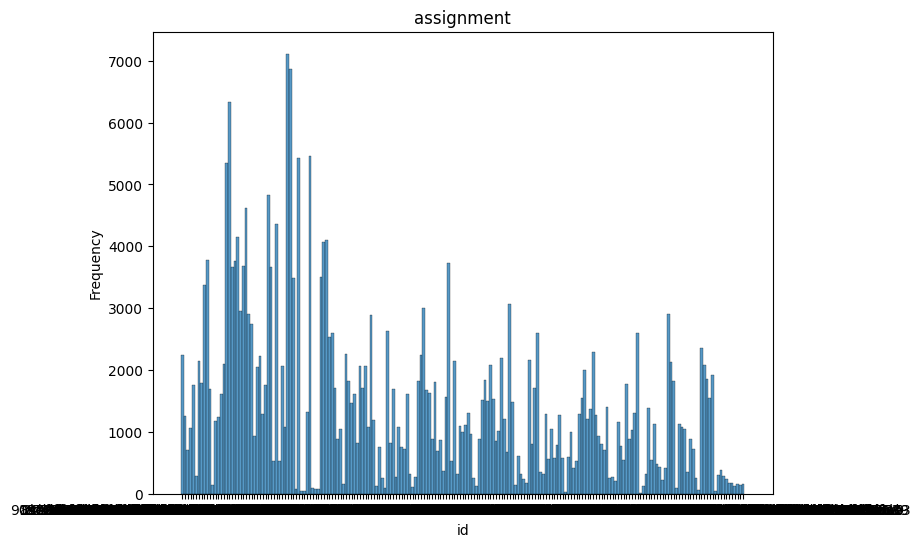

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df["assignment"],bins=10)
plt.title("assignment")
plt.xlabel("id")
plt.ylabel("Frequency")

In [8]:
df["problem"].nunique()

469

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

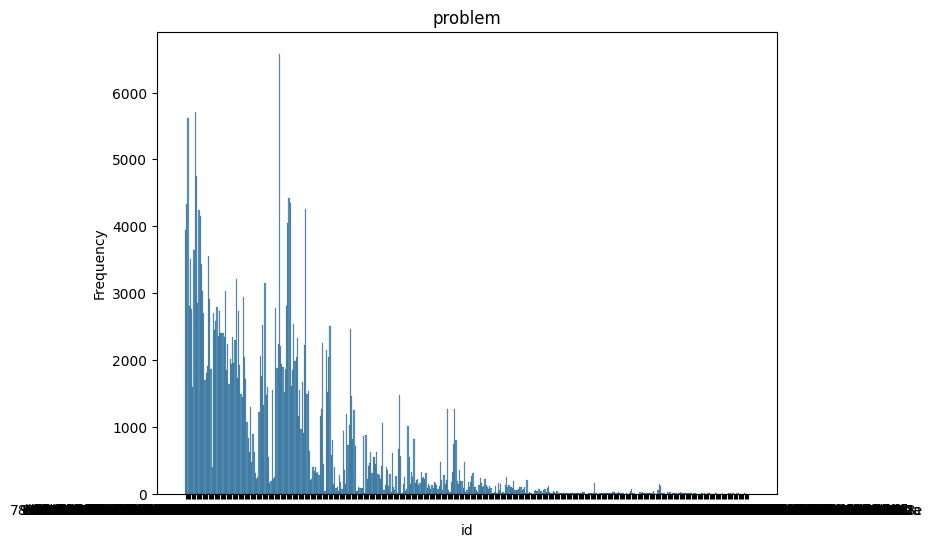

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df["problem"],bins=10)
plt.title("problem")
plt.xlabel("id")
plt.ylabel("Frequency")

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["user"],bins=10)
plt.title("user")
plt.xlabel("id")
plt.ylabel("Frequency")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

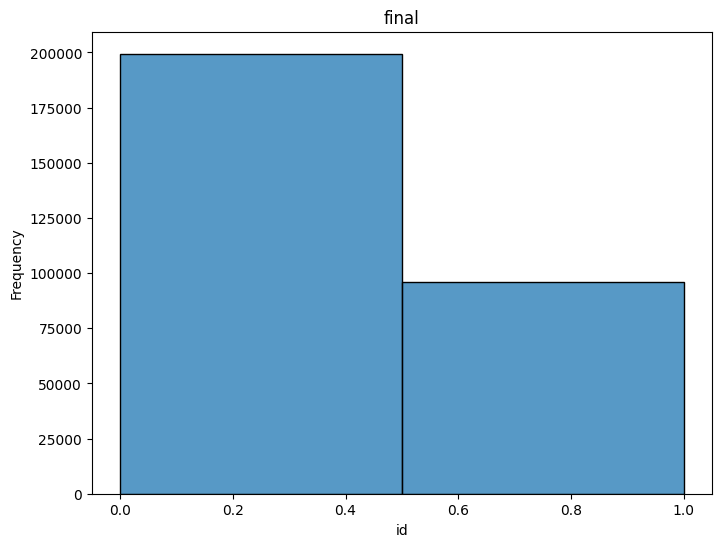

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df["is_final"],bins=2)
plt.title("final")
plt.xlabel("id")
plt.ylabel("Frequency")

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["status"],bins=4)
plt.title("status")
plt.xlabel("id")
plt.ylabel("Frequency")

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["pre_score"],bins=4)
plt.title("pre_score")
plt.xlabel("score")
plt.ylabel("Frequency")

In [ ]:
df["language"].nunique()

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["language"],bins=4)
plt.title("language")
plt.xlabel("language")
plt.ylabel("Frequency")

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["coefficient"],bins=4)
plt.title("coefficient")
plt.xlabel("coefficient")
plt.ylabel("Frequency")

## Tạo đặc trưng

In [148]:
## tạo đặc trưng đếm số lần nộp trễ, hơi trễ và đúng giờ
df['submit_late'] = (df['coefficient'] == 0).astype(int)
df['submit_semi_late'] = ((df['coefficient']  > 0) & (df['coefficient']  < 100)).astype(int)
df['submit_ontime'] = (df['coefficient']  == 100).astype(int)
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1


In [149]:
## Cột điểm cuối cùng dùng để tính những cột sau này cần thiết như bài tập đó bao nhiêu sinh viên đạt điểm tối đa
df['last_weighted_score'] = df['is_final'].astype(int) * (df['pre_score'] * df['coefficient'] / (10000*10)) 
## Số lần không đúng
df['is_error'] = (df['status'] != 'SCORE').astype(int)
## kiểm tra sinh viên hoàn thành bài đó
df['is_success_submit'] = ((df['is_final'] == 1) & (df['pre_score'] == 10000)).astype(int)
## chuẩn hóa thời gian
df['time'] = pd.to_datetime(df['created_at'], format='%m-%d %H:%M:%S', errors='coerce')
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,time
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,0.0,0,0,1900-10-09 08:02:04
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,0.0,0,0,1900-10-09 08:04:41
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 08:06:49
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 08:47:52
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 09:19:35


In [28]:
# ## tính thời gian làm cho 1 bài em chưa làm gì đoạn này nên có thể dùng
# df_start_time = df.groupby(['user', "problem"])['time'].min().reset_index() 
# df_end_time = df.groupby(['user', "problem"])['time'].max().reset_index()
# df_start_time = df_start_time.rename(columns={'time': 'assignment_start_time'})
# df_end_time = df_end_time.rename(columns={'time': 'assignment_end_time'})
 
# df = df.merge(df_start_time, on=['user', "problem"], how='left')
# df = df.merge(df_end_time, on=['user', "problem"], how='left')
 
# df['time_spent_hours'] = (df['assignment_end_time'] - df['assignment_start_time']).dt.total_seconds() / 3600
# df.head()
# df['submit_hour'] = df.apply(
#     lambda row: row['time'].hour if row['is_success_submit'] == 1 else 25,
#     axis=1
# )
# df['num_submit_assignment'] = df.groupby(['user', 'assignment'])['user'].transform('count')
# df['num_submit_problem'] = df.groupby(['user', 'problem'])['user'].transform('count')
# df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,...,last_weighted_score,is_error,is_success_submit,time,assignment_start_time,assignment_end_time,time_spent_hours,submit_hour,num_submit_assignment,num_submit_problem
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,...,0.0,0,0,1900-10-09 08:02:04,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,34,3
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,...,0.0,0,0,1900-10-09 08:04:41,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,25.0,34,3
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,...,1.0,0,1,1900-10-09 08:06:49,1900-10-09 08:02:04,1900-10-09 08:06:49,0.079167,8.0,34,3
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,...,1.0,0,1,1900-10-09 08:47:52,1900-10-09 08:47:52,1900-10-09 08:47:52,0.000000,8.0,34,1
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,...,1.0,0,1,1900-10-09 09:19:35,1900-10-09 09:19:35,1900-10-09 09:19:35,0.000000,9.0,34,1


In [150]:
df['submit_weekday'] = df['time'].dt.dayofweek
df.head(n = 5)
## đếm số người làm dc ass và prob sau đó nối lại
df_success = df[df['is_success_submit'] == 1]
assignment_completed_count = df_success.groupby('assignment')['user'].nunique().reset_index()
assignment_completed_count.columns = ['assignment', 'num_users_completed']

df_success = df[df['is_success_submit'] == 1]
problem_completed_count = df_success.groupby('problem')['user'].nunique().reset_index()
problem_completed_count.columns = ['problem', 'num_users_completed']

problem_completed_count['is_hard_problem'] = (problem_completed_count['num_users_completed'] < 30).astype(int)
problem_completed_count['is_hard_problem'] = problem_completed_count['is_hard_problem'].fillna(0).astype(int)
df = df.merge(
    problem_completed_count[['problem', 'is_hard_problem']],
    on='problem',
    how='left'
)

# df_success = df[df['is_success_submit'] == 1]
# assignment_completed_count = df_success.groupby('assignment')['user'].nunique().reset_index()
# assignment_completed_count.columns = ['assignment', 'num_users_completed']

# assignment_completed_count['is_hard_assignment'] = (assignment_completed_count['num_users_completed'] < 30).astype(int)
# assignment_completed_count['is_hard_assignment'] = assignment_completed_count['is_hard_assignment'].fillna(0).astype(int)
# df = df.merge(
#     assignment_completed_count[['assignment', 'is_hard_assignment']],
#     on='assignment',
#     how='left'
# )

In [151]:
df.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,time,submit_weekday,is_hard_problem
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,0.0,0,0,1900-10-09 08:02:04,1.0,0.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,0.0,0,0,1900-10-09 08:04:41,1.0,0.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 08:06:49,1.0,0.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 08:47:52,1.0,0.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 09:19:35,1.0,0.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   assignment           295198 non-null  object        
 1   problem              295198 non-null  object        
 2   user                 295198 non-null  object        
 3   is_final             295198 non-null  int64         
 4   status               295198 non-null  object        
 5   pre_score            295198 non-null  int64         
 6   coefficient          295198 non-null  int64         
 7   language             295198 non-null  object        
 8   created_at           295198 non-null  object        
 9   updated_at           295198 non-null  object        
 10  judgement            295198 non-null  object        
 11  submit_late          295198 non-null  int64         
 12  submit_semi_late     295198 non-null  int64         
 13  submit_ontime 

## Tạo bảng đặc trưng kết hợp các đặc trưng tạo ra và có sẵn

In [153]:
df_features = df.copy()
df_features.head()

,assignment,problem,user,is_final,status,pre_score,coefficient,language,created_at,updated_at,judgement,submit_late,submit_semi_late,submit_ontime,last_weighted_score,is_error,is_success_submit,time,submit_weekday,is_hard_problem
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,0.0,0,0,1900-10-09 08:02:04,1.0,0.0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,0.0,0,0,1900-10-09 08:04:41,1.0,0.0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 08:06:49,1.0,0.0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 08:47:52,1.0,0.0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",0,0,1,10.0,0,1,1900-10-09 09:19:35,1.0,0.0


In [154]:
## số lần nộp
df_features = df.groupby('user').size().reset_index(name='total_submissions')
## số lần nộp đúng và đúng giờ
df_success_submit_count = df.groupby('user')['is_success_submit'].sum().reset_index()
df_success_submit_count.columns = ['user', 'num_success_submit']
df_features = df_features.merge(df_success_submit_count, on='user', how='left')
## tổng số lần nộp trễ, hơi trễ, và đúng giờ
df_submit_types = df.groupby('user')[[
    'submit_late',
    'submit_semi_late',
    'submit_ontime'
]].sum().reset_index()
df_submit_types = df_submit_types.rename(columns={
    'submit_late': 'num_submit_late',
    'submit_semi_late': 'num_submit_semi_late',
    'submit_ontime': 'num_submit_ontime'
})
df_features = df_features.merge(df_submit_types, on='user', how='left')

# Trung bình số điểm làm được
df_avg_last_score = df.groupby('user')['last_weighted_score'].mean().reset_index()
df_avg_last_score.columns = ['user', 'avg_last_weighted_score']
df_features = df_features.merge(df_avg_last_score, on='user', how='left')

## số lần nộp lỗi
df_error_count = df.groupby('user')['is_error'].sum().reset_index()
df_error_count.columns = ['user', 'num_error_submissions']
df_features = df_features.merge(df_error_count, on='user', how='left')
df_features.head()

df_features.head(n = 5)

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,0,0,147,3.129252,28
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,72,0,0,259,2.905402,50
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,0,0,195,3.226738,20
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,0,0,100,4.700000,24
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,58,3,0,104,5.631019,13


In [155]:
 

 
 ## tần suất nộp bài trong tuần
df_weekday_counts = df.groupby(['user', 'submit_weekday']).size().unstack(fill_value=0).reset_index()
df_weekday_counts.columns = ['user'] + [f'num_submit_weekday_{i}' for i in range(7)]
weekday_map = {
    0: 'mon', 1: 'tue', 2: 'wed', 3: 'thu', 4: 'fri', 5: 'sat', 6: 'sun'
}
df_weekday_counts.rename(columns={i: f'num_submit_{name}' for i, name in weekday_map.items()}, inplace=True)
df_features = df_features.merge(df_weekday_counts, on='user', how='left')
df_features.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,0,0,147,3.129252,28,6,3,31,84,10,10,3
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,72,0,0,259,2.905402,50,5,60,56,115,14,7,2
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,0,0,195,3.226738,20,18,47,18,30,37,19,26
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,0,0,100,4.700000,24,2,15,16,35,11,11,10
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,58,3,0,104,5.631019,13,2,66,0,29,10,0,0


In [156]:
# ## đây là số lần nộp đc bài tập khó khai thác ở đây thử

# hard_count = df.groupby('user')['is_hard_assignment'].sum().reset_index()
# hard_count.columns = ['user', 'num_hard_assignments']
# df_features = df_features.merge(hard_count, on='user', how='left')
# df_features['num_hard_assignments'] = df_features['num_hard_assignments'].fillna(0).astype(int)
 
hard_count = df.groupby('user')['is_hard_problem'].sum().reset_index()
hard_count.columns = ['user', 'num_hard_problem']
df_features = df_features.merge(hard_count, on='user', how='left')
df_features['num_hard_problem'] = df_features['num_hard_problem'].fillna(0).astype(int)
df_features.head()


,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_problem
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,0,0,147,3.129252,28,6,3,31,84,10,10,3,0
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,72,0,0,259,2.905402,50,5,60,56,115,14,7,2,9
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,0,0,195,3.226738,20,18,47,18,30,37,19,26,29
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,0,0,100,4.700000,24,2,15,16,35,11,11,10,0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,58,3,0,104,5.631019,13,2,66,0,29,10,0,0,6


In [157]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     1489 non-null   object 
 1   total_submissions        1489 non-null   int64  
 2   num_success_submit       1489 non-null   int64  
 3   num_submit_late          1489 non-null   int64  
 4   num_submit_semi_late     1489 non-null   int64  
 5   num_submit_ontime        1489 non-null   int64  
 6   avg_last_weighted_score  1489 non-null   float64
 7   num_error_submissions    1489 non-null   int64  
 8   num_submit_weekday_0     1489 non-null   int64  
 9   num_submit_weekday_1     1489 non-null   int64  
 10  num_submit_weekday_2     1489 non-null   int64  
 11  num_submit_weekday_3     1489 non-null   int64  
 12  num_submit_weekday_4     1489 non-null   int64  
 13  num_submit_weekday_5     1489 non-null   int64  
 14  num_submit_weekday_6    

## chuẩn bị dữ liệu huấn luyện/

In [158]:
df_ck = pd.read_csv('/kaggle/input/cs114-reg/ck-public.csv')
df_qt = pd.read_csv('/kaggle/input/cs114-reg/qt-public.csv')
df_th = pd.read_csv('/kaggle/input/cs114-reg/th-public.csv')

df_scores = df_ck.merge(df_qt, on='hash', how='outer', suffixes=('_CK', '_QT'))
df_scores = df_scores.merge(df_th, on='hash', how='outer')
df_scores.head()


,hash,CK,diemqt,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5,7.5,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5,7,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5,9,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0,10,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0,9,6


In [159]:
df_scores = df_scores.rename(columns={
    'hash': 'user',
})
data = df_features.copy()
data = data.merge(df_scores, on='user', how='inner')

In [160]:
data.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_problem,CK,diemqt,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,0,0,147,3.129252,28,6,3,31,84,10,10,3,0,5.5,7.5,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,72,0,0,259,2.905402,50,5,60,56,115,14,7,2,9,6.5,7,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,0,0,195,3.226738,20,18,47,18,30,37,19,26,29,4.5,9,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,58,3,0,104,5.631019,13,2,66,0,29,10,0,0,6,5.0,10,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,79,0,0,199,4.000000,45,47,7,21,33,45,30,16,1,4.0,9,6


In [161]:
df_f_raw = data.copy()

In [162]:
df_f_raw= df_f_raw.dropna()

In [163]:
df_f_raw.columns

Index(['user', 'total_submissions', 'num_success_submit', 'num_submit_late',
       'num_submit_semi_late', 'num_submit_ontime', 'avg_last_weighted_score',
       'num_error_submissions', 'num_submit_weekday_0', 'num_submit_weekday_1',
       'num_submit_weekday_2', 'num_submit_weekday_3', 'num_submit_weekday_4',
       'num_submit_weekday_5', 'num_submit_weekday_6', 'num_hard_problem',
       'CK', 'diemqt', 'TH'],
      dtype='object')

In [164]:
df_f_raw.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,num_submit_weekday_2,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_problem,CK,diemqt,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,0,0,147,3.129252,28,6,3,31,84,10,10,3,0,5.5,7.5,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,72,0,0,259,2.905402,50,5,60,56,115,14,7,2,9,6.5,7,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,59,0,0,195,3.226738,20,18,47,18,30,37,19,26,29,4.5,9,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,58,3,0,104,5.631019,13,2,66,0,29,10,0,0,6,5.0,10,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,79,0,0,199,4.000000,45,47,7,21,33,45,30,16,1,4.0,9,6


In [165]:
df_f_raw['diemqt'] = df_f_raw['diemqt'].replace('\xa0', 0).astype(float)
df_f_raw['TH'] = df_f_raw['TH'].replace('\xa0', 0).astype(float)

In [166]:
df_f_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 760
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     755 non-null    object 
 1   total_submissions        755 non-null    int64  
 2   num_success_submit       755 non-null    int64  
 3   num_submit_late          755 non-null    int64  
 4   num_submit_semi_late     755 non-null    int64  
 5   num_submit_ontime        755 non-null    int64  
 6   avg_last_weighted_score  755 non-null    float64
 7   num_error_submissions    755 non-null    int64  
 8   num_submit_weekday_0     755 non-null    int64  
 9   num_submit_weekday_1     755 non-null    int64  
 10  num_submit_weekday_2     755 non-null    int64  
 11  num_submit_weekday_3     755 non-null    int64  
 12  num_submit_weekday_4     755 non-null    int64  
 13  num_submit_weekday_5     755 non-null    int64  
 14  num_submit_weekday_6     755 no

In [167]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
 

X = df_f_raw.drop(columns=['user', 'CK', 'diemqt', 'TH'])
y = df_f_raw['CK']  
 
 

scaler =  StandardScaler()
X_num_scaled = scaler.fit_transform(X)
 

 
X_train, X_test, y_train, y_test = train_test_split(
   X_num_scaled, y, test_size=0.2, random_state=42
)
 
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000215 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 604, number of used features: 14
[LightGBM] [Info] Start training from score 5.433775
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [168]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
 

X = df_f_raw.drop(columns=['user', 'CK', 'diemqt', 'TH'])
y = df_f_raw['diemqt']  
 
 

scaler =  StandardScaler()
X_num_scaled = scaler.fit_transform(X)
 

 
X_train, X_test, y_train, y_test = train_test_split(
   X_num_scaled, y, test_size=0.2, random_state=42
)
 
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 604, number of used features: 14
[LightGBM] [Info] Start training from score 8.252483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [169]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
 

X = df_f_raw.drop(columns=['user', 'CK', 'diemqt', 'TH'])
y = df_f_raw['TH']  
 
 

scaler =  StandardScaler()
X_num_scaled = scaler.fit_transform(X)
 

 
X_train, X_test, y_train, y_test = train_test_split(
   X_num_scaled, y, test_size=0.2, random_state=42
)
 
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 604, number of used features: 14
[LightGBM] [Info] Start training from score 7.224338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

## Nộp bài wecode

In [18]:
data_submit = df_features.copy()
data_submit = data_submit.merge(df_scores, on='user', how='left')

In [19]:
data_submit['has_score'] = data_submit['CK'].notna().astype(int)


In [34]:
data_submit.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,...,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_assignments,num_hard_problem,CK,diemqt,TH,has_score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517,28,6,3,...,84,10,10,3,0,0,5.5,7.5,5,1
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015,50,5,60,...,115,14,7,2,0,0,6.5,7,8.5,1
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385,20,18,47,...,30,37,19,26,0,20,4.5,9,7,1
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,34,14,52,47.000000,24,2,15,...,35,11,11,10,0,0,NaN,NaN,NaN,0
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187,13,2,66,...,29,10,0,0,6,1,5.0,10,10,1


In [36]:
df_with_score = data_submit[data_submit['has_score'] == 1].copy()
df_without_score = data_submit[data_submit['has_score'] == 0].copy()

In [37]:
df_with_score.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,...,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_assignments,num_hard_problem,CK,diemqt,TH,has_score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517,28,6,3,...,84,10,10,3,0,0,5.5,7.5,5,1
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015,50,5,60,...,115,14,7,2,0,0,6.5,7,8.5,1
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385,20,18,47,...,30,37,19,26,0,20,4.5,9,7,1
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187,13,2,66,...,29,10,0,0,6,1,5.0,10,10,1
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,83,37,79,40.000000,45,47,7,...,33,45,30,16,0,0,4.0,9,6,1


In [39]:
df_f_train = df_with_score.dropna()

In [38]:
df_f_test = df_without_score

In [40]:
df_f_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,...,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_assignments,num_hard_problem,CK,diemqt,TH,has_score
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,34,14,52,47.000000,24,2,15,...,35,11,11,10,0,0,NaN,NaN,NaN,0
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,144,50,52,40,52,34.722222,41,9,44,...,15,0,2,4,0,0,NaN,NaN,NaN,0
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,8,5,2,1,5,62.500000,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,192,50,92,47,53,26.041667,43,31,19,...,47,0,25,40,0,0,NaN,NaN,NaN,0
80,0bf111a9caedf02804f6991792490e63bc21058a,199,82,39,81,79,40.255829,23,1,13,...,71,28,79,2,0,7,NaN,NaN,NaN,0


In [41]:
df_f_train.columns

Index(['user', 'total_submissions', 'num_success_submit', 'num_submit_late',
       'num_submit_semi_late', 'num_submit_ontime', 'avg_last_weighted_score',
       'num_error_submissions', 'num_submit_weekday_0', 'num_submit_weekday_1',
       'num_submit_weekday_2', 'num_submit_weekday_3', 'num_submit_weekday_4',
       'num_submit_weekday_5', 'num_submit_weekday_6', 'num_hard_assignments',
       'num_hard_problem', 'CK', 'diemqt', 'TH', 'has_score'],
      dtype='object')

In [42]:
df_f_train['diemqt'] = df_f_train['diemqt'].replace('\xa0', 0).astype(float)
df_f_train['TH'] = df_f_train['TH'].replace('\xa0', 0).astype(float)

In [43]:
df_f_train.head()

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,...,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_assignments,num_hard_problem,CK,diemqt,TH,has_score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,55,38,54,31.292517,28,6,3,...,84,10,10,3,0,0,5.5,7.5,5.0,1
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,83,91,85,29.054015,50,5,60,...,115,14,7,2,0,0,6.5,7.0,8.5,1
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,67,44,92,59,32.267385,20,18,47,...,30,37,19,26,0,20,4.5,9.0,7.0,1
4,013de369c439ab0ead8aa7da64423aa395a8be39,107,64,23,25,59,56.310187,13,2,66,...,29,10,0,0,6,1,5.0,10.0,10.0,1
5,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,83,37,79,40.000000,45,47,7,...,33,45,30,16,0,0,4.0,9.0,6.0,1


In [44]:
df_f_test.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,user,total_submissions,num_success_submit,num_submit_late,num_submit_semi_late,num_submit_ontime,avg_last_weighted_score,num_error_submissions,num_submit_weekday_0,num_submit_weekday_1,...,num_submit_weekday_3,num_submit_weekday_4,num_submit_weekday_5,num_submit_weekday_6,num_hard_assignments,num_hard_problem,CK,diemqt,TH,has_score
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,100,47,34,14,52,47.000000,24,2,15,...,35,11,11,10,0,0,NaN,NaN,NaN,0
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,144,50,52,40,52,34.722222,41,9,44,...,15,0,2,4,0,0,NaN,NaN,NaN,0
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,8,5,2,1,5,62.500000,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,0
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,192,50,92,47,53,26.041667,43,31,19,...,47,0,25,40,0,0,NaN,NaN,NaN,0
80,0bf111a9caedf02804f6991792490e63bc21058a,199,82,39,81,79,40.255829,23,1,13,...,71,28,79,2,0,7,NaN,NaN,NaN,0


In [61]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
 

X = df_f_train.drop(columns=['user', 'CK', 'diemqt', 'TH',"has_score"])
y = df_f_train['diemqt']  
 
 
X_test = df_f_test.drop(columns=['user', 'CK', 'diemqt', "TH","has_score"])

scaler =  StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

 
# #X_train, X_test, y_train, y_test = train_test_split(
#    X_num_scaled, y, test_size=0.2, random_state=42
# )
 
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

model.fit(X_train , y)
 
y_pred = model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"MAE: {mae:.4f}")
# print(f"RMSE: {rmse:.4f}")
# print(f"R² Score: {r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1796
[LightGBM] [Info] Number of data points in the train set: 755, number of used features: 16
[LightGBM] [Info] Start training from score 8.283444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [62]:
df_final = df_f_test[['user']].copy()
df_final['diemqt'] = y_pred
df_final.head()

,user,diemqt
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.726224
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,9.281324
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,9.355802
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,7.755210
80,0bf111a9caedf02804f6991792490e63bc21058a,8.631268


In [51]:
df_final = df_f_test[['user']].copy()
df_final['diemqt'] = y_pred
df_final.head()

,user,diemqt
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.726224
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,9.281324
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,9.355802
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,7.755210
80,0bf111a9caedf02804f6991792490e63bc21058a,8.631268


In [53]:
df_final['CK'] = y_pred
df_final.head()

,user,diemqt,CK
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.726224,2.825617
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,9.281324,6.076096
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,9.355802,3.196302
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,7.755210,4.133445
80,0bf111a9caedf02804f6991792490e63bc21058a,8.631268,6.288368


In [55]:
df_final['TH'] = y_pred
df_final.head()

,user,diemqt,CK,TH
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.726224,2.825617,5.728022
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,9.281324,6.076096,7.128991
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,9.355802,3.196302,4.240282
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,7.755210,4.133445,5.552773
80,0bf111a9caedf02804f6991792490e63bc21058a,8.631268,6.288368,8.678558


In [56]:
df_final['tb'] = (df_final['CK'] + df_final['diemqt'] + df_final['TH']) / 3
df_final.head()

,user,diemqt,CK,TH,tb
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,6.726224,2.825617,5.728022,5.093288
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,9.281324,6.076096,7.128991,7.495470
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,9.355802,3.196302,4.240282,5.597462
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,7.755210,4.133445,5.552773,5.813809
80,0bf111a9caedf02804f6991792490e63bc21058a,8.631268,6.288368,8.678558,7.866065


In [57]:
with open("ck.txt", "w") as f_ck:
    for u, s in zip(df_final['user'],df_final['CK']):
        f_ck.write(f"{u},{s:.2f}\n")
 
with open("qt.txt", "w") as f_qt:
    for u, s in zip(df_final['user'], df_final['diemqt']):
        f_qt.write(f"{u},{s:.2f}\n")
 
with open("th.txt", "w") as f_th:
    for u, s in zip(df_final['user'], df_final['TH']):
        f_th.write(f"{u},{s:.2f}\n")
 
with open("avg.txt", "w") as f_avg:
    for u, s in zip(df_final['user'], df_final['tb']):
        f_avg.write(f"{u},{s:.2f}\n")